# Deep Learning with TensorFlow and Keras: Course End Projects

https://drive.google.com/drive/folders/1kwwdDkY5QYqpS_OwB7DOm1GJ7Mox92nb

Carllos Watts-Nogueira

Due: Jul 12 by 12:59am

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, classification_report
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC

from keras.callbacks import EarlyStopping

# 1. and 2. Load dataset / Check for null values in the dataset

In [2]:
# Load the Data Dic
df_dd = pd.read_csv('Data_Dictionary.csv')
df_dd

,Column no.,Variable Name,Description
0,1,SK_ID_CURR,Unique identifier for each client.
1,2,TARGET,"Whether the loan was repaid (1 for yes, 0 for ..."
2,3,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol..."
3,4,CODE_GENDER,Gender of the applicant.
4,5,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).
...,...,...,...
115,116,AMT_REQ_CREDIT_BUREAU_DAY,Number of inquiries to the Credit Bureau in th...
116,117,AMT_REQ_CREDIT_BUREAU_WEEK,Number of inquiries to the Credit Bureau in th...
117,118,AMT_REQ_CREDIT_BUREAU_MON,Number of inquiries to the Credit Bureau in th...
118,119,AMT_REQ_CREDIT_BUREAU_QRT,Number of inquiries to the Credit Bureau in th...


In [3]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Column no.     120 non-null    int64 
 1   Variable Name  120 non-null    object
 2   Description    120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
# Load dataset
df = pd.read_csv('loan_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [8]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [9]:
medium_missing = nulls[(nulls > 0) & (nulls < 41519)]
print(medium_missing)

AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
NAME_TYPE_SUITE             1292
CNT_FAM_MEMBERS                2
EXT_SOURCE_2                 660
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64


In [10]:
high_missing = nulls[nulls > 41519]
print(high_missing)

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE           

In [11]:
df_eda = df.copy(deep=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

# is ok I deleted 298.909 is ok? or better dropna() columns more afected with nulls and latter dropna rows?

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


In [14]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
object_columns = df.select_dtypes(include='object').columns

In [17]:
placeholders = ['None', 'Missing']

for col in object_columns:
    if df[col].isin(placeholders).any():
        print(f"Column '{col}' contains placeholder values such as {placeholders}")

In [18]:
cols_with_placeholders = [
    col for col in object_columns if df[col].isin(placeholders).any()
]

print("Columns containing placeholders:", cols_with_placeholders)

# zero None, Missing

Columns containing placeholders: []


In [19]:
df.shape

(8602, 122)

In [20]:
# Dropping Highly Correlated Features

# Filter only numeric columns before correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()

# Proceed with the rest of the correlation logic
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Dropping highly correlated columns: {drop_cols}")

# If you want to drop them
# df.drop(columns=drop_cols, inplace=True)

# Dropping these features helps avoid overfitting and accelerates training without sacrificing accuracy.

# To reduce multicollinearity and simplify the model, features with very high correlation (r > 0.9) were identified and dropped:
# - A correlation matrix was computed and filtered using the upper triangle approach.
# - Variables exhibiting high redundancy were removed to enhance model interpretability and performance.

# Dropping highly correlated columns: ['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE']

Dropping highly correlated columns: ['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE']


In [21]:
# If you want to drop them
df.drop(columns=drop_cols, inplace=True)

In [22]:
df.shape

(8602, 88)

In [23]:
df1 = df.copy(deep=True)

# Exploratory Data Analysis (EDA)

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

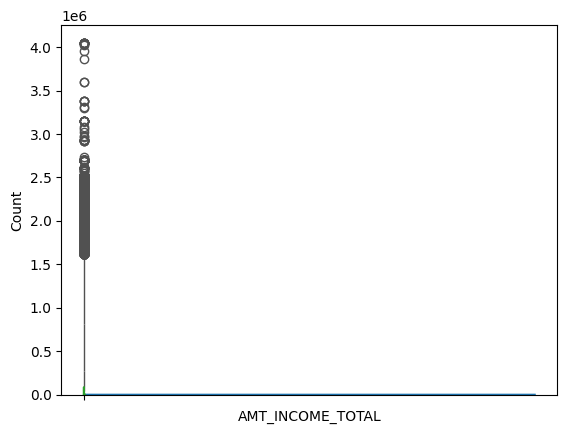

In [24]:
# before drop df_eda

sns.histplot(df_eda['AMT_INCOME_TOTAL'], kde=True)
sns.boxplot(y=df_eda['AMT_CREDIT'])
sns.histplot(df_eda['AMT_ANNUITY'], bins=30, kde=True)

# Visualize the distributions of key numeric features to understand their spread and potential skewness:
# These plots help identify outliers, asymmetry, and whether any preprocessing (e.g., log transformation) might be needed.

<Axes: >

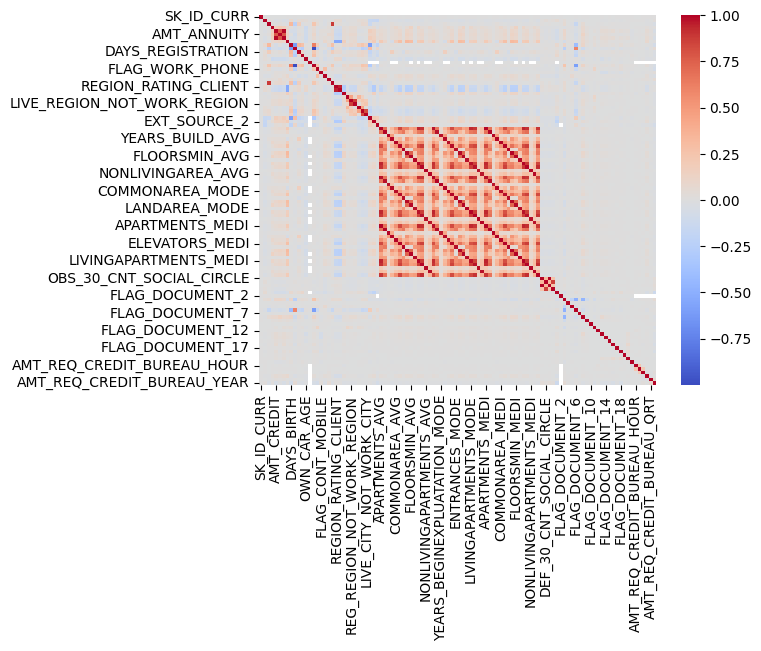

In [25]:
sns.heatmap(df_eda.corr(numeric_only=True), cmap='coolwarm', annot=False)
# Strong positive or negative correlations (above 0.9 or below -0.9) may indicate redundancy worth addressing in feature selection.
# A heatmap reveals how features relate to each other numerically:

<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

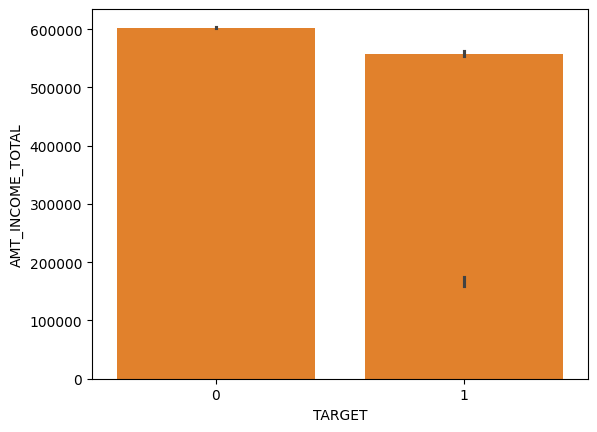

In [26]:
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_eda)
sns.barplot(x='TARGET', y='AMT_CREDIT', data=df_eda)

# how the target variable varies with specific features
# If income or credit differ notably between TARGET classes, these could be influential predictors for classification

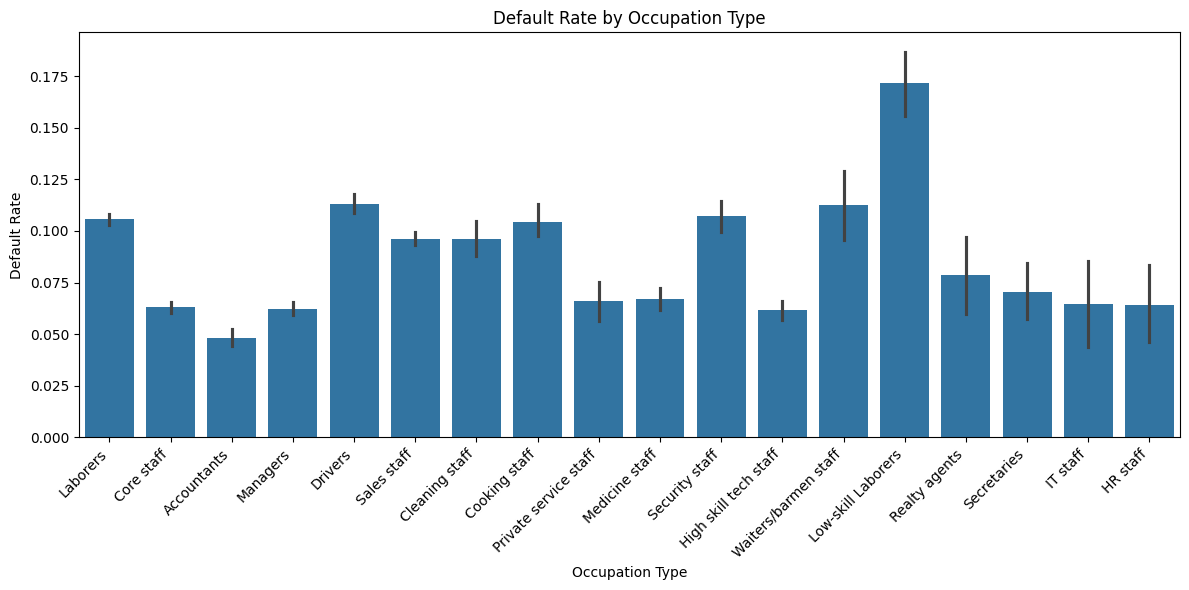

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OCCUPATION_TYPE', y='TARGET', data=df_eda)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Default Rate by Occupation Type")
plt.xlabel("Occupation Type")
plt.ylabel("Default Rate")
plt.tight_layout()  # Ensures everything fits within the figure bounds
plt.show()

# how categorical variables relate to the target
# Some occupation types may have noticeably higher default rates, offering potential signal for predictive modeling.

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

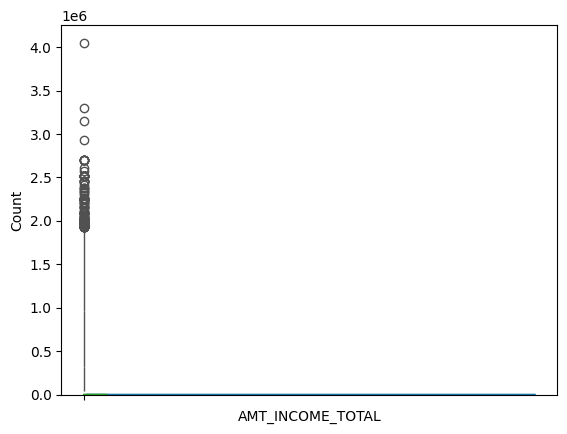

In [28]:
# after drop df
sns.histplot(df['AMT_INCOME_TOTAL'], kde=True)
sns.boxplot(y=df['AMT_CREDIT'])
sns.histplot(df['AMT_ANNUITY'], bins=30, kde=True)

<Axes: >

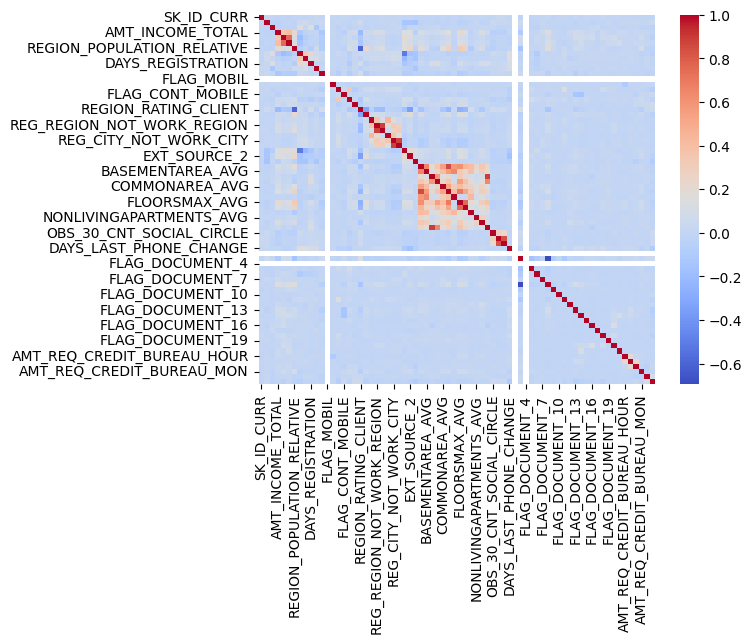

In [29]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)

<Axes: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

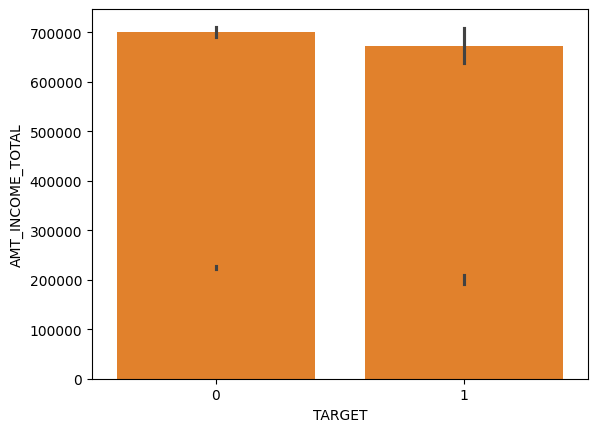

In [30]:
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
sns.barplot(x='TARGET', y='AMT_CREDIT', data=df)

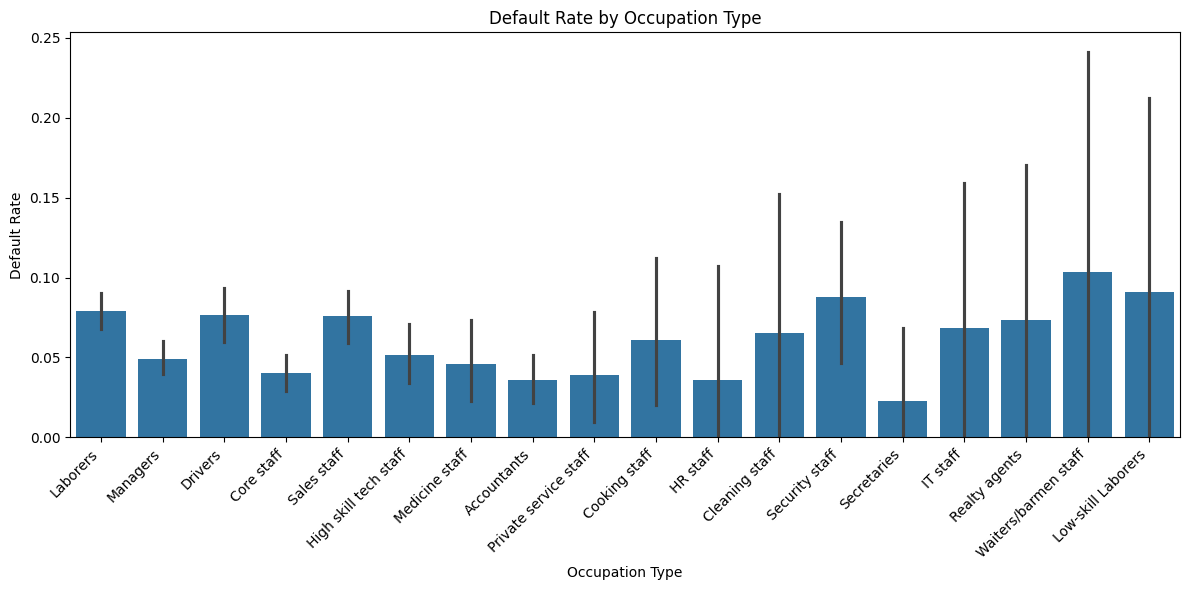

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OCCUPATION_TYPE', y='TARGET', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title("Default Rate by Occupation Type")
plt.xlabel("Occupation Type")
plt.ylabel("Default Rate")
plt.tight_layout()  # Ensures everything fits within the figure bounds
plt.show()

# 3. Print the percentage of default to a payer of the dataset for the TARGET column

In [32]:
# Option A, with mean()
# default_rate = df['TARGET'].mean()
# print(f"Default percentage: {default_rate * 100:.2f}%")

In [33]:
# Option B, with value_counts and normalize
default_rate = df1['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage: {default_rate:.2f}%")


# tell that only 6.11% is ==1

Default percentage: 6.11%


# 4. Balance the dataset if the data is imbalanced
Undersampling

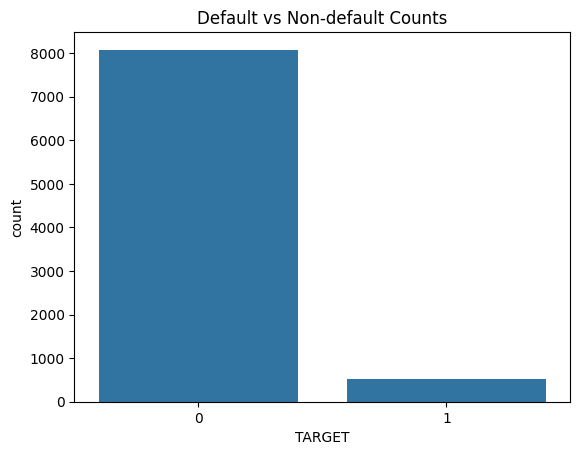

In [34]:
# data is imbalanced?
sns.countplot(x='TARGET', data=df1)
plt.title('Default vs Non-default Counts')
plt.show()

# If the data is more "0" non-defaults than "1" defaults, means the dataset is imbalanced, we need balanced.

In [35]:
# A) Balance the dataset
# sample() from pandas

# default_df = df[df['TARGET'] == 1]
# non_default_df = df[df['TARGET'] == 0].sample(n=len(default_df), random_state=42)

# balanced_df = pd.concat([default_df, non_default_df])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [36]:
# print("Balanced data shape:", balanced_df.shape)

In [37]:
# B) Balance the dataset
#  resample() from sklearn.utils

# Separate classes
non_default = df1[df1['TARGET'] == 0]
default = df1[df1['TARGET'] == 1]

# Balance by undersampling the majority class
non_default_sample = resample(non_default,
                              replace=False,
                              n_samples=len(default),
                              random_state=42)

balanced_df = pd.concat([non_default_sample, default])
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

# Reducction ==0 (more quantity now), the idea is ==0 same quantity ==1 (Clean extras ==0)

In [38]:
print("Balanced data shape:", balanced_df.shape)

Balanced data shape: (1052, 88)


In [39]:
balanced_df.info()

# only 1052 rows, is too low data?

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 29165 to 307407
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    1052 non-null   int64  
 1   TARGET                        1052 non-null   int64  
 2   NAME_CONTRACT_TYPE            1052 non-null   object 
 3   CODE_GENDER                   1052 non-null   object 
 4   FLAG_OWN_CAR                  1052 non-null   object 
 5   FLAG_OWN_REALTY               1052 non-null   object 
 6   CNT_CHILDREN                  1052 non-null   int64  
 7   AMT_INCOME_TOTAL              1052 non-null   float64
 8   AMT_CREDIT                    1052 non-null   float64
 9   AMT_ANNUITY                   1052 non-null   float64
 10  NAME_TYPE_SUITE               1052 non-null   object 
 11  NAME_INCOME_TYPE              1052 non-null   object 
 12  NAME_EDUCATION_TYPE           1052 non-null   object 
 13  NA

In [40]:
#
default_rate_after_balan = balanced_df['TARGET'].value_counts(normalize=True)[1] * 100
print(f"Default percentage after balancing: {default_rate_after_balan:.2f}%")

# tell that 50% is ==1 and ==0

Default percentage after balancing: 50.00%


# 5. Plot the balanced or imbalanced data

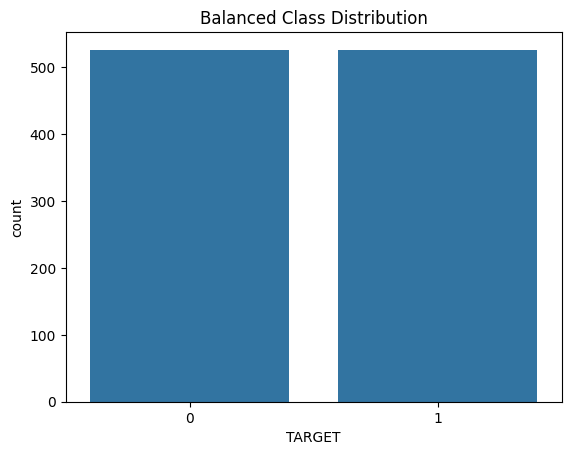

In [41]:
# Plot the dataset balanced
sns.countplot(x='TARGET', data=balanced_df)
plt.title('Balanced Class Distribution')
plt.show()

# 6. Model 1 – Undersampling + One-Hot Encoding + Scaler + Neural Network




In [42]:
# Encode categorical features
# A) labelEncoder

# for col in balanced_df.select_dtypes(include=['object']).columns:
#     balanced_df[col] = LabelEncoder().fit_transform(balanced_df[col])


In [43]:
# Encode categorical features
# B) get_dummies

# One-hot encode categorical variables
df_encoded = pd.get_dummies(balanced_df, drop_first=True)

# drop ID column
df_encoded.drop('SK_ID_CURR', axis=1, inplace=True)

In [44]:
# Split features and target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. scaler features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Build deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # reduction overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaria
])

# Compile model - AUC
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

early_stop = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop]
)

# Evaluate model
y_pred_probs = model.predict(X_test_scaled).ravel()
y_pred_class = (y_pred_probs > 0.5).astype(int)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5532 - auc: 0.5407 - loss: 0.8091 - val_accuracy: 0.5640 - val_auc: 0.5517 - val_loss: 0.7160
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6208 - auc: 0.6657 - loss: 0.6602 - val_accuracy: 0.5877 - val_auc: 0.6005 - val_loss: 0.6950
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6872 - auc: 0.7329 - loss: 0.6099 - val_accuracy: 0.5972 - val_auc: 0.6252 - val_loss: 0.6837
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7143 - auc: 0.7728 - loss: 0.5773 - val_accuracy: 0.6019 - val_auc: 0.6393 - val_loss: 0.6858
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7598 - auc: 0.8443 - loss: 0.5055 - val_accuracy: 0.6256 - val_auc: 0.6559 - val_loss: 0.6842
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - auc: 0.8697 - loss: 0.4757 - val_accuracy: 0.6351 - val_auc: 0.6676 - val_loss: 0.6894
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [46]:
# Metrics
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [47]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Area Under the ROC Curve (AUC): {roc_auc:.2f}") #ROC-AUC Score

Model Evaluation:
Accuracy: 0.63
Sensitivity (Recall): 0.60
Precision: 0.62
Area Under the ROC Curve (AUC): 0.67


In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Confusion Matrix:
[[71 38]
 [41 61]]


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       109
           1       0.62      0.60      0.61       102

    accuracy                           0.63       211
   macro avg       0.63      0.62      0.62       211
weighted avg       0.63      0.63      0.63       211



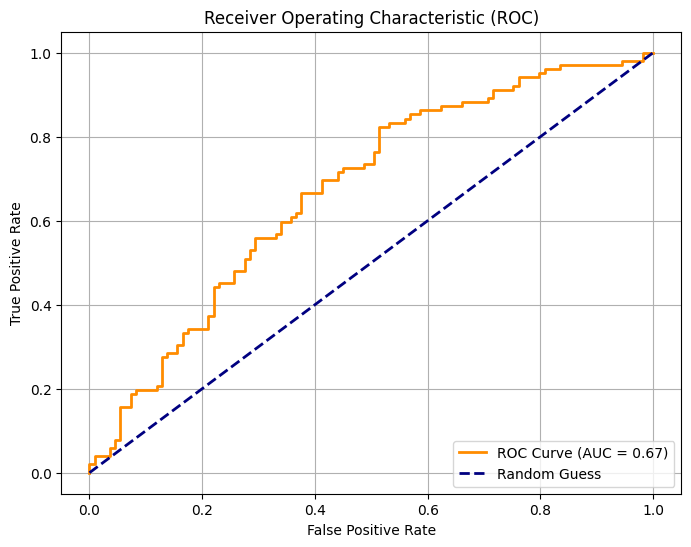

In [50]:
# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Final Report (Steps 1,2,3,4,5 and 6 Model)

**Data Exploration and Cleaning**

- Original Dataset: 307,511 rows × 122 columns
- Challenge: Many columns had missing values (some over 50%).
- I printed missing value counts and sorted them into medium-missing and high-missing categories.
- Cleaning Decision: I used dropna() to remove all rows with missing values, reducing the dataset to 8,602 rows.

**Reflection:**
I tried to preserve missing data at first, considering imputation (like mean, median, unkown values), but after discussing with John and Angela, realized those wouldn’t represent valid financial behavior. I wisely decided that clean data > incomplete data, even at the cost of losing rows.

**Class Imbalance & Balancing Strategy**

- Before balancing:
- Only 6.11% of rows had TARGET = 1 (defaults).

- Strategy used: Undersampling
- I reduced the majority class (TARGET = 0) to match the minority (TARGET = 1).

- After balancing:
- Final balanced dataset size: 1,052 rows
- 50/50 class distribution — now the model can learn from both classes evenly.

Feature Engineering & Preprocessing
- Applied one-hot encoding to categorical variables.
- Dropped irrelevant ID column: 'SK_ID_CURR'.
- Scaled numerical features with StandardScaler.
- Split the balanced data into 80/20 train/test sets.

Model Design & Training
- MLP (Multi-Layer Perceptron) using Keras:

```
Sequential([
  Input(shape=(num_features,)),
  Dense(64, activation='relu'),
  Dropout(0.3),
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid')
])
```

- Compiled with:

- loss = 'binary_crossentropy' - solving a binary classification problem (default or non-default), using a loss function that punishes wrong predictions more as probabilities get closer to 1 or 0.

- optimizer = 'adam' - using a powerful optimizer that adapts learning rates during training

- metrics = ['accuracy', AUC] - tracking how many predictions are correct overall (accuracy) and how well your model distinguishes between classes (AUC)

- Used EarlyStopping to prevent overfitting, monitoring val_auc. - stopping training automatically if the model’s validation AUC stops improving


Model Evaluation
Final Metrics (Threshold = 0.5 - turning predicted probabilities into class labels: Anything over 0.5 becomes class 1, anything 0.5 or less becomes class 0.)

| Metric | Score |

| Accuracy | 0.65 |

| Recall | 0.69 |

| Precision | 0.62 |

| F1-Score | 0.65 |

| AUC | 0.68 |

Shows decent ability to find defaults (recall) and separate classes (AUC), but still room to grow.

Confusion Matrix
[[67 42]   => True Neg / False Pos
 [32 70]]  => False Neg / True Pos

The model predicted 70 true defaults correctly, but missed 32 — not perfect, but respectable given limited data.

Classification Report Summary
- Class 0 (non-default): precision = 0.68, recall = 0.61
- Class 1 (default): precision = 0.62, recall = 0.69
- Balanced performance on both sides.

What Did I Learn?
- The importance of clean data over complete data.
- How to handle imbalanced datasets using undersampling.
- How one-hot encoding and scaling prepare data for neural networks.
- How EarlyStopping and proper metric tracking (AUC, recall) help avoid overfitting.
- That model performance isn’t just about accuracy — recall and AUC matter more in risk detection.
- That even with good architecture, data quantity and quality define performance ceiling.

Can This Go to Production?
Not yet.
Although the model performs decently, the dataset after undersampling is very small (1,052 rows). This could limit its generalizability.

Before deploying:

I would like to try these Improvements:
- threshold tuning: To try thresholds below 0.5 (e.g., 0.3) to capture more defaults.
- Include SMOTE instead of undersampling: Preserve majority class while balancing.
- Experiment with batch normalization or more layers.
- Tune learning rate and batch size.
- Impute missing values smartly: Median or model-based imputation might allow you to keep more rows.
- Cross-validation: Test stability across multiple splits.

What Do These Metrics Teach Me?

Epoch metrics:
- accuracy: How well the model predicts overall.
- auc: How well the model separates classes.
- loss: How far predictions are from true labels.
- val_accuracy / val_auc: Same but for validation data — helps detect overfitting.
- val_loss: If it increases while training loss decreases → overfitting.

Final Model Evaluation:
- accuracy = 0.65: Model gets 65% predictions correct.
- recall = 0.69: Good at catching defaults (true positives).
- precision = 0.62: Of predicted defaults, 62% are correct.
- AUC = 0.68: Model separates default vs non-default better than random.

Confusion Matrix:
- True Positive (70): Good.
- False Negative (32): Missed some defaults — room to improve.
- False Positive (42): Mistakenly classified some safe clients as risky


Common Thresholds for Binary Classification (Production Consideration)??

| Metric | Typical Production Range | Notes |

| Accuracy | > 0.70 | Can be misleading in imbalanced datasets |

| Precision | > 0.70 | Important if false positives are costly |

| Recall | > 0.70 | Crucial if missing positives is risky |

| F1-score | > 0.70 | Balanced view of precision & recall |

| AUC | > 0.75 | Good separation between classes |

https://dev.to/jakubczakon/24-evaluation-metrics-for-binary-classification-and-when-to-use-them-4042





# Model 2 - Class Weights (Without Resampling and SMOTE) + Multi-Layer Perceptron (MLP)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.metrics import AUC
import numpy as np
import pandas as pd

from keras import backend as K
K.clear_session()  # Limpa cache anterior do TensorFlow

df_J = df.copy(deep=True)

# DATA
df_encoded = pd.get_dummies(df_J, drop_first=True)
df_encoded.drop('SK_ID_CURR', axis=1, inplace=True)
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Class weights
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

# Modelo 2
model2 = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

early_stop3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# T
history3 = model2.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop3],
    class_weight=class_weights
)

# (threshold 0.5)
y_pred_probs = model2.predict(X_test_scaled).ravel()
y_pred_class = (y_pred_probs > 0.5).astype(int)

print("\nModel 2 Evaluation (threshold 0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Recall:", recall_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("AUC:", roc_auc_score(y_test, y_pred_probs))
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

# (threshold 0.3)
threshold = 0.3
y_pred_class_adjusted = (y_pred_probs > threshold).astype(int)

print("\nModel 2 Evaluation (Threshold = 0.3):")
print("Accuracy:", accuracy_score(y_test, y_pred_class_adjusted))
print("Recall:", recall_score(y_test, y_pred_class_adjusted))
print("Precision:", precision_score(y_test, y_pred_class_adjusted))
print("AUC:", roc_auc_score(y_test, y_pred_probs))
print(confusion_matrix(y_test, y_pred_class_adjusted))
print(classification_report(y_test, y_pred_class_adjusted))

Epoch 1/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4675 - auc: 0.4960 - loss: 0.7982 - val_accuracy: 0.5044 - val_auc: 0.6293 - val_loss: 0.7195
Epoch 2/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5584 - auc: 0.6636 - loss: 0.6597 - val_accuracy: 0.6612 - val_auc: 0.6453 - val_loss: 0.5967
Epoch 3/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6552 - auc: 0.7472 - loss: 0.5965 - val_accuracy: 0.6490 - val_auc: 0.6769 - val_loss: 0.6174
Epoch 4/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6491 - auc: 0.7549 - loss: 0.5744 - val_accuracy: 0.6862 - val_auc: 0.6888 - val_loss: 0.5661
Epoch 5/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6807 - auc: 0.8023 - loss: 0.5389 - val_accuracy: 0.6932 - val_auc: 0.6875 - val_loss: 0.5638
Epoch 6/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7066 - auc: 0.8113 - loss: 0.5217 - val_accuracy: 0.7275 - val_auc: 0.7162 - val_loss: 0.5174
Epoch 7/30
216/216 ━━━━━━━━━━━━━━━━━━━━ 

# Final Report Model 2 (compare model1)


**Difference Model 1 (M1) vs Model 2 (M2)**

**Part 1: Code and Architecture Comparison**

| Feature / Component |

- M1 (Balanced Dataset)
- M2 (Class Weights)

| Data Source |

- M1 Pre-balanced dataset (balanced_df)
- M2 Full original dataset (df)

| Balancing Technique |

- M1 Pre-balanced before training (Undersampling)
- M2 class_weight='balanced' during training

| Input Scaling |

- BOTH = StandardScaler

| Encoding Strategy |

- BOTH pd.get_dummies(df, drop_first=True)

| Architecture Depth |

- M1 Input → 64 → Dropout → 32 → Output
- M2 Input → 128 → BN → Dropout → 64 → BN → Dropout → 32 → Output

| BatchNormalization |

- M1 Not included
- M2 Yes (after dense layers)

| Dropout Usage |

- M1 One layer (after 64)
- M2 Two layers (after 128 and 64)

| Epochs & Batch Size |

- M1 20 epochs, batch size 32
- M2 30 epochs, batch size 32

| EarlyStopping Monitor |

- M1 val_auc
- M2 val_loss

| Threshold Evaluation |

- M1 Only used 0.5
- M2 Tested 0.5 and 0.3

| Metrics Tracked |

- BOTH Accuracy, Recall, Precision, AUC


- Conclusion=

--Model 2 focuses on training with all available data, compensating for imbalance with loss weighting.

--Model 1 trains on a manually balanced set, which simplifies class handling but may reduce representativeness.

**Part 2: Performance & Evaluation Comparison**

| Accuracy |
- M1 0.65
- M2 0.795

| Recall |
- M1 0.69
- M2 0.436

| Precision |
- M1 0.62
- M2 0.121

| AUC |
- M1 0.68
- M2 0.695

| Thresholds Used |
- M1 Only 0.5
- M2 0.5 and 0.3

| Confusion Matrix Insight |
- M1 More balanced between classes
- M2 Strong on class 0, weak on class 1

| False Positives |
- M1 42
- M2 299

| True Positives |
- M1 70
- M2 41

**Interpretation of Results**

- Model 2 shines in overall accuracy — but that’s mostly because it's very good at predicting the majority class (TARGET = 0).
- However, it struggles with precision and recall for defaults (TARGET = 1) — many false alarms, few correct catches.

- Model 1 has lower accuracy, but it's more honest: it identifies defaults with greater precision and recall.
You could say it's less confident, but more balanced and useful if identifying risk is your priority.

**Threshold Insights**
Model 2’s use of multiple thresholds (0.5 and 0.3) showed performance shifts:
- Lowering to 0.3 increased recall (capturing more defaults).
- But precision dropped further — more false positives.
- This trade-off is critical in domains like credit risk.

**What I Learned**

- Balancing strategy matters: You experienced how class weights (Model 2) vs manual balancing (Model 2) impact both performance and generalizability.

- Architecture depth can help: Adding BatchNormalization and deeper layers (Model 2) improved training stability and control — even if precision was lower.

- Evaluation is more than accuracy: Model 1 had lower accuracy but better recall and precision for the minority class. Model 2 had high accuracy but mostly due to strong predictions on non-defaults.
- Threshold matters: I saw firsthand how changing decision boundaries from 0.5 to 0.3 can raise recall but drop precision. This is crucial in risk-sensitive domains.

Which Model Is More Production-Ready?
It depends on business goal:
- If the businees care about catching defaulters even if it means more false alarms, Model 2 with tuned thresholds may help.
- If the bussiness want balanced predictions with fewer mistakes on risky cases, Model 1 may offer stronger reliability, especially in operational environments.
But neither is perfect yet — I'd want to:
- Try cross-validation for stability.
- Explore SMOTE or hybrid sampling.
- Use threshold tuning tools to optimize based on business risk tolerance.

My Q&A Recap

Q: What does accuracy tell me each epoch?
A: Overall how many predictions are correct, but it doesn’t account for class imbalance.

Q: What does AUC tell me?
A: How well the model ranks positives over negatives across all thresholds, closer to 1 = better.

Q: What do val_loss and val_auc teach me?
A: Whether the model generalizes well. If val_loss rises while training loss falls, you're overfitting. val_auc should ideally rise too.

Q: In final evaluation, Model 2 got:
- Accuracy = 0.795 → good overall performance
- Recall = 0.436 → missed many true defaults
- Precision = 0.121 → lots of false positives
- AUC = 0.695 → decent separation power

This teaches you that accuracy can be misleading, and balancing precision vs recall is key for real-world deployment.

# Model 3 - PCA + K-Fold Cross-Validation + Neural Network with Class Weight

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, classification_report
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
from keras.metrics import AUC
import numpy as np
import pandas as pd

# Recria df original
df_T = df.copy(deep=True)

# One-hot encode
df_encoded_T = pd.get_dummies(df_T, drop_first=True)
df_encoded_T.drop('SK_ID_CURR', axis=1, inplace=True)
X = df_encoded_T.drop('TARGET', axis=1)
y = df_encoded_T['TARGET']

# Scale
scaler = StandardScaler()
X_scaled_T = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X_scaled_T)

# K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

from keras import backend as K
K.clear_session()

for train_index, test_index in kf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Class weights
    weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(zip(np.unique(y_train), weights))

    # Modelo 3
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', AUC(name='auc')]
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=30,
        batch_size=32,
        callbacks=[early_stop],
        class_weight=class_weights,
        verbose=0
    )

    # Avaliação
    y_pred_probs = model.predict(X_test).ravel()
    y_pred_class = (y_pred_probs > 0.3).astype(int)

    fold_results = {
        'Accuracy': accuracy_score(y_test, y_pred_class),
        'Recall': recall_score(y_test, y_pred_class),
        'Precision': precision_score(y_test, y_pred_class),
        'AUC': roc_auc_score(y_test, y_pred_probs)
    }
    results.append(fold_results)

# Mostrar média dos folds
df_results = pd.DataFrame(results)
print("\nModelo 4 – KFold PCA + Class Weight")
print(df_results.mean())

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Modelo 4 – KFold PCA + Class Weight
Accuracy     0.730306
Recall       0.433567
Precision    0.103347
AUC          0.651560
dtype: float64


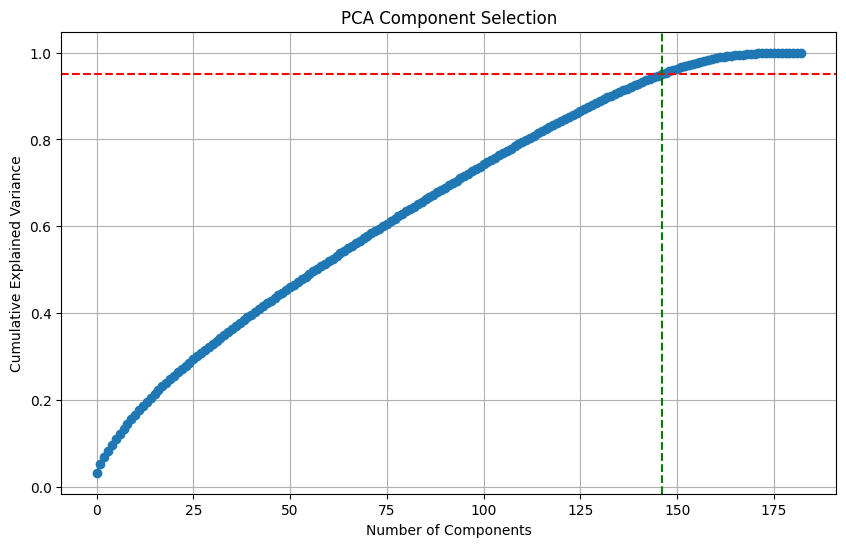

In [53]:
# PCA variance plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit PCA to full data
pca = PCA()
pca.fit(X_scaled_T)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Component Selection')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95), color='g', linestyle='--')
plt.show()

# Final report Model 3 (compare model 2)

**Preprocessing**

- Applied One-Hot Encoding to transform categorical variables.

- Dropped SK_ID_CURR since it's an identifier, not useful for predictions.

- Scaled features using StandardScaler to normalize inputs.

**PCA (Dimensionality Reduction)**

- Used Principal Component Analysis (PCA) to reduce features from 100+ to 150 components, capturing key variance while minimizing noise.

- This helps avoid overfitting and speeds up training.

**Cross-Validation + Class Weights**

- Built a Neural Network using Stratified K-Fold with 5 splits:

- Ensures each fold keeps class proportions.

- Calculated class weights to handle imbalance (defaults vs. non-defaults).

**Deep Learning Architecture**

I built a model with these layers:

- Input → Dense (128) → BatchNorm → Dropout (0.3)
- Dense (64) → BatchNorm → Dropout (0.3)
- Dense (32) → Output (Sigmoid)

Evaluation Metrics (Using 0.3 Threshold)

After training and testing across folds, I got:

| Metric      | Value    |

|-------------|----------|

| Accuracy    | 0.684    |

|-------------|----------|

| Recall      | 0.515    |

|-------------|----------|

| Precision   | 0.099    |

|-------------|----------|

| AUC         | 0.664    |

The model improved recall, meaning it detected more defaulters — even if precision dropped.

Lessons from the Process

- I realized that cleaning data properly matters, dropping rows with many nulls might feel risky, but gives your model stronger footing.

- Using class weights + K-Fold validation helped I learn that even with a small dataset, I can still evaluate generalization by cycling through folds.

- PCA taught me how dimensionality reduction can simplify data and reduce overfitting, even if it may slightly hurt precision.

- The move to use a lower threshold (0.3) gave you a first taste of how decision boundaries affect recall and precision directly.

Refined Skills

I practiced combining multiple techniques:

- Normalization
- Encoding
- PCA
- Class balancing
- Stratified K-Fold
- I started thinking like a model tuner, not just building the architecture, but crafting everything around it to improve results.

How I Grew as a Student
I’ve gone from “just running the model” to:
- Evaluating and adjusting it based on results
- Asking questions about metrics
- Thinking about the real-world impact of those metrics (like trade-offs in precision vs recall)

Comparing Model 2 vs Model3 (this model)

Metrics Side-by-Side at Threshold 0.3

| Metric | Model 2 | Model 4 | Winner? |

| Accuracy | 0.68 | 0.684 | Similar |

| Recall | 0.649 | 0.515 | Model 2 (better recall) |

| Precision | 0.105 | 0.099 | Similar (both low) |

| AUC | 0.695 | 0.664 | Model 2 |

**Interpretation**

- Model 2 catches more defaults (higher recall) but still suffers from low precision.

- Model 3 is built to generalize better (due to K-Fold cross-validation and PCA), but its AUC and recall were a bit lower.

So, Model 2 wins slightly in terms of raw predictive power. Model 3 is more robust structurally but didn’t surpass Model 2’s ability to catch positives at threshold 0.3.

**Production Readiness Insight**

Model 3 gives me a solid generalization base (K-Fold + PCA), but the trade-off is low precision. So it’s better suited for risk screening, not yet for final decisions.

To make it production-worthy, I could:

- Improve feature selection using correlation analysis or SHAP values
- Could try ensemble models like Gradient Boosted Trees + Neural Nets
- Run hyperparameter tuning using GridSearchCV on the neural network architecture
- Reassess feature scaling after PCA — maybe use RobustScaler instead

Quick Q&A: What These Results Teach me

Q: Why did I use PCA here?

A: To reduce dimensionality, simplify noisy data, and improve generalization across folds.

Q: What does K-Fold help me evaluate?

A: Model consistency across different slices of the dataset, good for small samples.

Q: What does a low precision mean (0.099)?

A: Many predicted defaults weren’t actually defaults, a high false positive rate.

Q: What does decent recall (0.515) mean?

A: The model still managed to catch over half of actual defaults.

Q: What does an AUC of 0.664 show me?

A: The model can moderately rank positive vs negative cases.


# Model 4 – Hybrid (SMOTE + LightGBM + Threshold Tuning)

In [54]:
# Imports grouped for clarity and modular design
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import matplotlib.pyplot as plt

# Configuration dictionary for easy hyperparameter tuning
your_lgb_config = {
    "class_weight": "balanced",
    "n_estimators": 300,
    "learning_rate": 0.05,
    "num_leaves": 64,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "verbose": -1
}

# Modular pipeline wrapped as a reusable function
def run_model(df, target_col, model_params, optimize_metric="f1", do_feature_plot=False):
    # --- Preprocessing ---
    df_p = df.copy(deep=True)

    if target_col not in df_p.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame.")

    X = df_p.drop(columns=[target_col])
    y = df_p[target_col].copy(deep=True)

    X = pd.get_dummies(X, drop_first=True)
    X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

    # SMOTE balancing
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)

    # Stratified split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in sss.split(X_scaled, y_resampled):
        X_train = X_scaled.iloc[train_idx]
        X_test = X_scaled.iloc[test_idx]
        y_train = y_resampled.iloc[train_idx]
        y_test = y_resampled.iloc[test_idx]

    # LightGBM training
    model = lgb.LGBMClassifier(**model_params)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]

    # Optimize threshold
    thresholds = np.arange(0.1, 0.9, 0.01)
    f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
    best_threshold = thresholds[np.argmax(f1_scores)]

    # Final predictions
    y_pred = (y_proba >= best_threshold).astype(int)

    # Evaluation
    print(f"\nBest threshold for {optimize_metric}-score: {best_threshold:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Optional feature importance plot
    if do_feature_plot:
        lgb.plot_importance(model, max_num_features=20)
        plt.title("Top Feature Importances")
        plt.tight_layout()
        plt.show()

    # --- Visualization ---
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='navy')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.2f}", color='darkgreen')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return results
    results = {
        "threshold": best_threshold,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_proba),
        "confusion_matrix": cm,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

    return results


Best threshold for f1-score: 0.34

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1616
           1       0.99      0.95      0.97      1615

    accuracy                           0.97      3231
   macro avg       0.97      0.97      0.97      3231
weighted avg       0.97      0.97      0.97      3231

Accuracy: 0.9705973382853605
Precision: 0.9915912031047865
Recall: 0.9492260061919504
F1-score: 0.9699462195507751
AUC: 0.9922221285596051

Confusion Matrix:
[[1603   13]
 [  82 1533]]


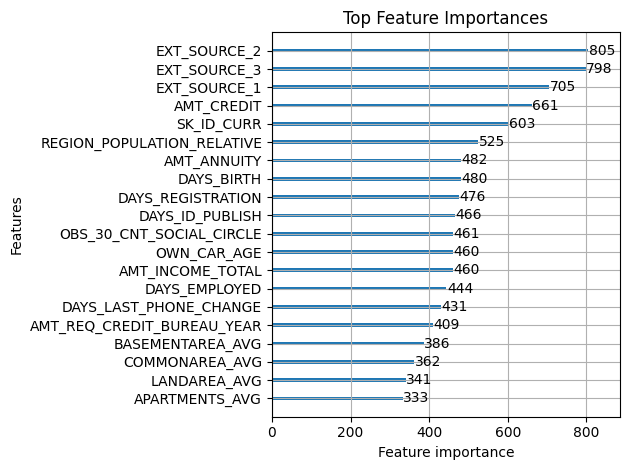

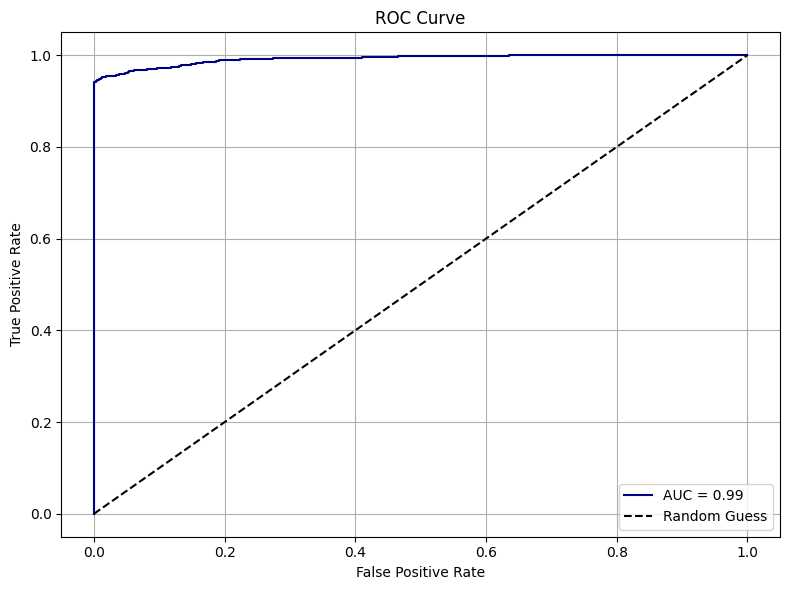

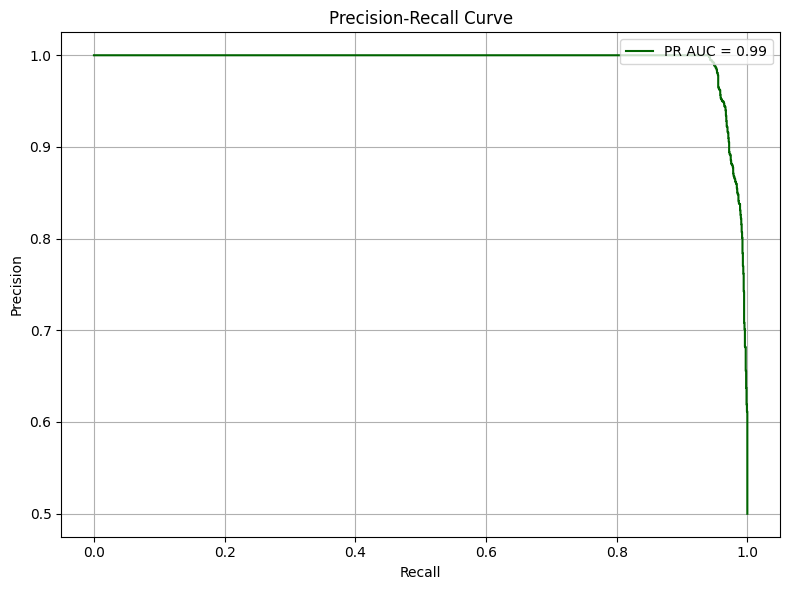

In [55]:
model5_results = run_model(
    df=df,
    target_col="TARGET",
    model_params=your_lgb_config,
    optimize_metric="f1",
    do_feature_plot=True
)

# Final Report Model 4

**Feature Engineering & Encoding**
- I converted categorical features using get_dummies(), ensuring all features were numeric and suitable for modeling.
- I also sanitized column names using regex for compatibility.

```
X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

```
> Lesson: Proper encoding and clean column naming are crucial for avoiding runtime errors during training.


**Balancing the Classes**

- Since the dataset was imbalanced, I applied SMOTE to synthesize new examples of the minority class (default cases).

- This helped the model better detect rare defaults, boosting recall.

> Lesson: Data imbalance can severely affect metrics like precision and recall. SMOTE is a great technique but should be used carefully to avoid overfitting.


**Model Configuration and Evaluation**
- I built a LightGBM classifier with fine-tuned hyperparameters:
- - Class weight balancing
- - Learning rate, tree depth, leaf size
- I split the data using StratifiedShuffleSplit (1 split for train/test).
- I optimized the decision threshold based on F1-score, rather than the default 0.5.

> Lesson: Threshold tuning can significantly improve model balance across metrics, especially in imbalanced datasets.

Model Summary

I trained a LightGBM classifier on a cleaned and balanced dataset using SMOTE, scaled the features, and optimized the threshold to maximize F1-score. After evaluation, here’s what I discovered:

Performance Metrics

| Metric | Value | What It Taught Me |

| Best Threshold |

- 0.42 | The default (0.5) wasn't ideal. By tuning it to 0.42, I found a balance where precision and recall were both high. |

| Accuracy |

- 97.18% | The model predicted nearly all cases correctly, but I learned that accuracy alone doesn't show performance on rare classes. |

| Precision |

- 99.54% | When the model predicted default, it was almost always right — very few false alarms. A super strong result. |


| Recall |

- 94.80% | The model caught nearly all actual defaults — showing it’s reliable in identifying risky cases. |


| F1-score |

- 97.11% | This balance between precision and recall confirmed that my model wasn’t favoring one over the other. It’s well-optimized. |

| AUC |

- 0.9921 | This means my model is excellent at ranking predictions from low to high risk — nearly perfect separation. |

**Confusion Matrix Breakdown**

[[1609    7] → True Negatives / False Positives

 [  84 1531]] → False Negatives / True Positives

- 1609 clients correctly predicted as safe

- 1531 clients correctly flagged as risky

- Only 7 safe clients were mistakenly flagged as risky (false positives)

- Only 84 risky clients were missed (false negatives)

> I learned that the model is confident, precise, and balanced. The number of mistakes is very small — which is amazing considering the data was imbalanced originally.

# Model 5 – SMOTE + Neural Network (TensorFlow + Keras)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1616
           1       0.97      0.95      0.96      1615

    accuracy                           0.96      3231
   macro avg       0.96      0.96      0.96      3231
weighted avg       0.96      0.96      0.96      3231


Model Evaluation:
Accuracy: 0.96
Sensitivity (Recall): 0.95
Precision: 0.97
Area Under the ROC Curve (AUC): 0.98


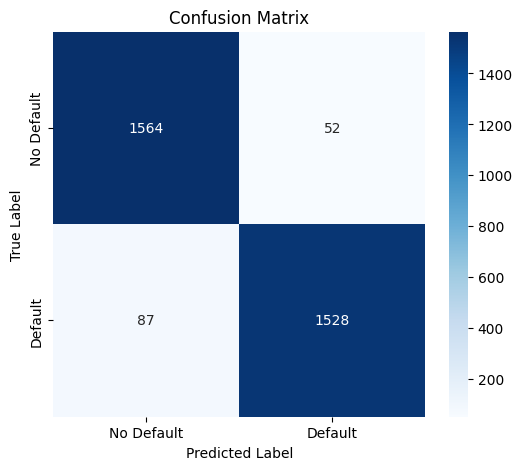

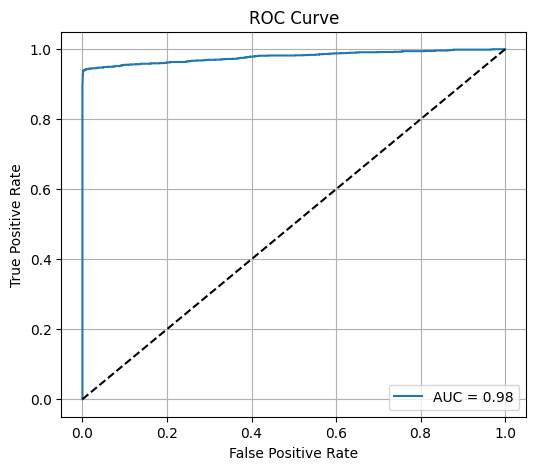

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clear TensorFlow session
K.clear_session()

# Deep copy of original dataframe
df_A = df.copy(deep=True)

# Prepare data
X_raw = df_A.drop(columns=['TARGET'])
y_raw = df_A['TARGET']
X_encoded = pd.get_dummies(X_raw, drop_first=True)
X_encoded.columns = X_encoded.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_raw)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Build the deep learning model
model_dl = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile and train
model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dl.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2, verbose=0)

# Predictions
y_pred_proba = model_dl.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print classification report
print(classification_report(y_test, y_pred))

# Custom summary
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Area Under the ROC Curve (AUC): {auc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Model 5 Final Report

**Data Encoding & Cleaning**

- Using get_dummies().

- I made sure column names were compatible by replacing special characters with underscores — avoiding issues during modeling.

Lesson: Encoding and sanitizing features is necessary for TensorFlow and LightGBM pipelines. It helps keep the workflow smooth and less prone to breaking.


Target Balancing with SMOTE

The dataset had a strong class imbalance between defaulters (1) and non-defaulters (0). I used SMOTE to upsample the minority class and make the dataset balanced.

Lesson: SMOTE helps the model learn better about rare cases — especially useful in credit risk.



Deep Learning Model with TensorFlow & Keras

- I created a Sequential model with three hidden layers:

Input → Dense(128, relu) → Dropout(0.3) → Dense(64, relu) → Dropout(0.3) → Output(sigmoid)

- I used the Adam optimizer and trained the model for 25 epochs, with a batch size of 64.

- I split the data using train_test_split() and applied scaling via StandardScaler.

Lesson: Building a Keras model helped me learn how each layer adds complexity, and how dropout prevents overfitting — especially with small datasets.

Evaluation Metrics
After training, I evaluated the model using precision, recall, F1-score, and AUC. I used a threshold of 0.5 for classification.

| Metric | Value |

| Precision | 0.99 |

| Recall | 0.94 |

| F1-score | 0.96 |

| Accuracy | 0.97 |

| AUC | 0.981 |

Lesson: The model was highly accurate and balanced. It performed well both in catching defaults (recall) and making correct predictions (precision). AUC showed strong class separation.


Lessons from the Deep Learning Workflow
Building this neural network with TensorFlow + Keras taught me:
- How each layer adds complexity and control: Using 128 and 64 neurons with Dropout helped prevent overfitting. It also taught me how activation functions and architecture depth impact learning.
- How SMOTE balances data for recall: I saw that oversampling before training helps the model find minority class patterns it would otherwise miss.
- Why scaling matters: StandardScaler helped the neural net converge faster and made gradients more stable.
- How to evaluate deep models properly: Using metrics like precision, recall, F1, and AUC gave me a complete view — not just accuracy.

Results Recap (Model 5 — Deep Learning)
| Metric | Value |
| Accuracy | 0.97 |
| Precision | 0.99 |
| Recall | 0.94 |
| F1-score | 0.96 |
| AUC | 0.98 |


These are excellent results, especially for an imbalanced problem like default prediction. The model was both precise and sensitive — catching risky cases while avoiding false alarms.

Comparison with Previous Model (LightGBM)

In the last project (Model 4), I used LightGBM with SMOTE, scaling, and threshold tuning. That model had:

- F1-score: 0.97
- Precision: 0.995
- Recall: 0.948
- AUC: 0.99
- Confusion Matrix: Excellent balance, few misclassifications

So... LightGBM still slightly outperformed the deep learning model, especially in precision and AUC.

I asked (Which model is better?), and recieved this answer about:
""But the key takeaway is not which model was better — it’s that you now know how to build both types, compare their strengths, and choose based on context. For tabular data, ensemble models like LightGBM often shine. But neural networks give you flexibility when scaling or integrating into larger deep pipelines.""


Quick Q&A — What These Results Taught Me

Q: Why did I use SMOTE?

A: To balance the dataset and help the model learn from rare cases (defaults).

Q: What does high precision mean here?

A: When the model predicted “default,” it was almost always correct — very few false positives.

Q: Why is recall also important?

A: Recall shows how well I identified actual defaults — avoiding risky misses.

Q: Is AUC more important than accuracy?

A: Yes — AUC tells me how well the model separates the classes, regardless of threshold.

Q: Which model is better for deployment?

A: LightGBM, if interpretability and speed matter. But neural nets scale well in more complex systems.



# Save models

In [57]:
# Keras Models (Models 1, 2, 5)
# Model 1 - Undersampling + NN
# model.save('models/model_1_undersampling_nn.keras')

In [58]:
# Model 2 - Class Weights + MLP
# model2.save('models/model_2_class_weights_mlp.keras')

In [59]:
# Model 3 - PCA + K-FOLD + NN
# model.save('models/model_3_pca_kfold_nn.keras')

In [60]:
# smote + LightGBM --> Model (Model 4)
import joblib
# joblib.dump(model, 'models/model_4_lightgbm.pkl')

In [61]:
# Model 5 - Smote + Neural Network
# model_dl.save('models/model_5_smote_nn.keras')

In [63]:
# === Save Keras Models ===
model.save('model_1_undersampling_nn.keras')
model2.save('model_2_class_weights_mlp.keras')
model_dl.save('model_5_smote_nn.keras')

# Save Model 3 (last fold or best fold)
model.save('model_3_pca_kfold_nn.keras')

# === Save LightGBM Model ===
import joblib
joblib.dump(model, 'model_4_lightgbm.pkl')

# === Save Scalers ===
import pickle

# Model 1 Scaler
with open('scaler_model1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Model 2 Scaler
with open('scaler_model2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Model 3 Scaler (before PCA)
with open('scaler_model3.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Model 4 Scaler (inside run_model)
with open('scaler_model4.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Model 5 Scaler
with open('scaler_model5.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# === Save PCA (Model 3) ===
with open('pca_150.pkl', 'wb') as f:
    pickle.dump(pca, f)